Cluster labels assigned by K-Means:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]

Centroids of the clusters:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


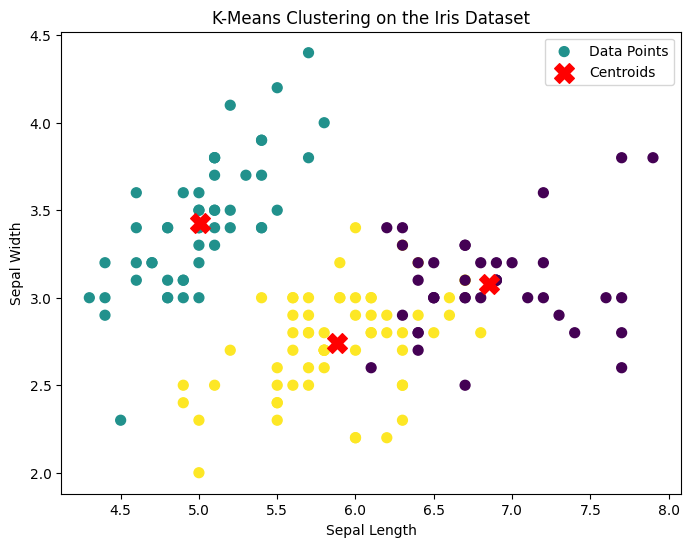

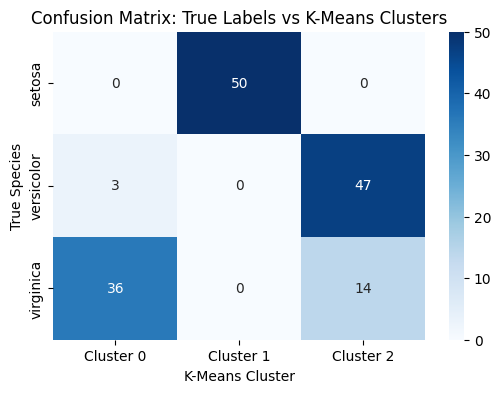

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# --- Step 1: Load the Iris Dataset ---
iris = datasets.load_iris()
X = iris.data           # Features: sepal length, sepal width, petal length, petal width
y_true = iris.target    # True species labels (for reference only)

# --- Step 2: Apply K-Means Clustering ---
# Since the Iris dataset has 3 species, we set k = 3.
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Cluster labels for each data point
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster labels assigned by K-Means:")
print(labels)
print("\nCentroids of the clusters:")
print(centroids)

# --- Step 3: Visualize the Clusters ---
# For visualization purposes, we plot the first two features (sepal length and sepal width).
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering on the Iris Dataset')
plt.legend()
plt.show()

# --- Step 4: Comparing Clusters with True Labels (Optional) ---
# Although K-Means is unsupervised, we can compare the clustering results with the actual species.
conf_matrix = confusion_matrix(y_true, labels)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=[f'Cluster {i}' for i in range(k)],
            yticklabels=iris.target_names)
plt.xlabel('K-Means Cluster')
plt.ylabel('True Species')
plt.title('Confusion Matrix: True Labels vs K-Means Clusters')
plt.show()



20 Newsgroups Dataset
Description: A collection of about 20,000 newsgroup documents across 20 topics. It’s commonly used for text clustering and topic modeling.




In [3]:
import zipfile
import os

# Path to the zip file containing the alt.atheism text files.
zip_path = "/content/alt.atheism.txt.zip"  # Replace with the correct path if needed

# Extract text files from the zip archive.
documents = []
filenames = []
with zipfile.ZipFile(zip_path, 'r') as z:
    # List all file names in the archive
    for filename in z.namelist():
        if filename.endswith(".txt"):
            with z.open(filename) as f:
                content = f.read().decode('utf-8', errors='replace')
                documents.append(content)
                filenames.append(filename)

print(f"Extracted {len(documents)} documents.")

# If no documents were found, notify the user.
if not documents:
    raise ValueError("No text documents found in the zip file.")

# --- Step 1: Vectorize the Text Data ---
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer to convert text into numerical features.
# Set max_df to 1.0 to consider all terms since you only have one document
vectorizer = TfidfVectorizer(stop_words='english', max_df=1.0)
X = vectorizer.fit_transform(documents)

# --- Step 2: Apply K-Means Clustering ---
from sklearn.cluster import KMeans

# Define the number of clusters.
# Reduce the number of clusters to be less than or equal to the number of samples.
# In this case, since you only have 1 document, you can only have 1 cluster.
k = 1  # Change to 1 or less if you have fewer documents
km = KMeans(n_clusters=k, random_state=42)
km.fit(X)

# Get the cluster labels for each document.
labels = km.labels_
print("\nCluster labels for each document:")
for filename, label in zip(filenames, labels):
    print(f"{filename}: Cluster {label}")

# --- Step 3: Display Top Terms for Each Cluster ---
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print(f"\nCluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # top 10 terms per cluster
    print(", ".join(top_terms))

Extracted 1 documents.

Cluster labels for each document:
alt.atheism.txt: Cluster 0

Top terms per cluster:

Cluster 0:
edu, god, atheism, writes, subject, people, com, don, article, alt


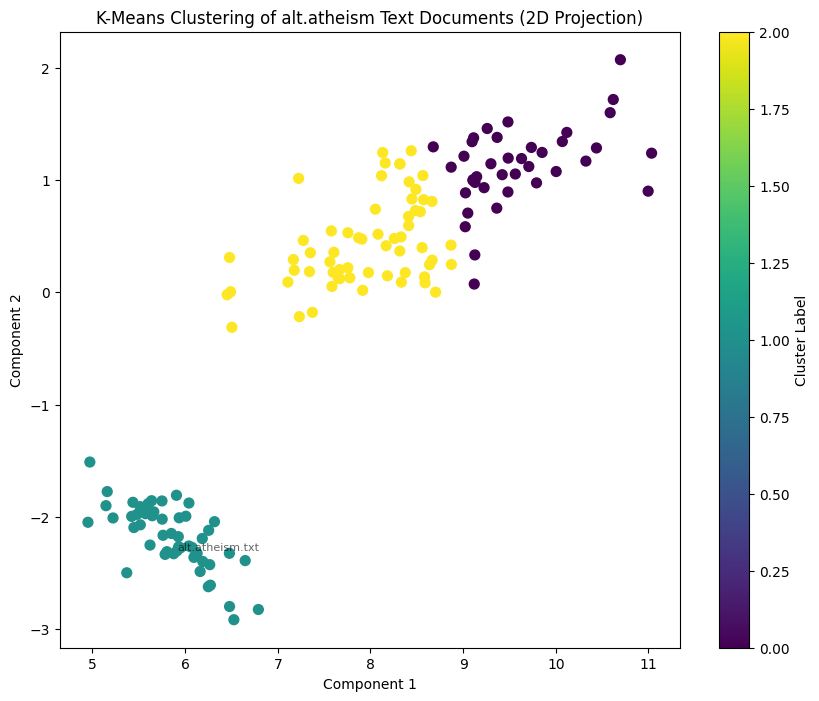

In [5]:
# --- Step 4: Visualize the Clusters ---
# Since X is a high-dimensional sparse matrix, use TruncatedSVD for dimensionality reduction.
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50)

# Optionally annotate each point with its filename (this may be crowded if there are many documents)
for i, filename in enumerate(filenames):
    plt.annotate(filename, (X_2d[i, 0], X_2d[i, 1]), fontsize=8, alpha=0.6)

plt.title('K-Means Clustering of alt.atheism Text Documents (2D Projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()